# figure 1

In [1]:
# in `ppt`

# figure 2 

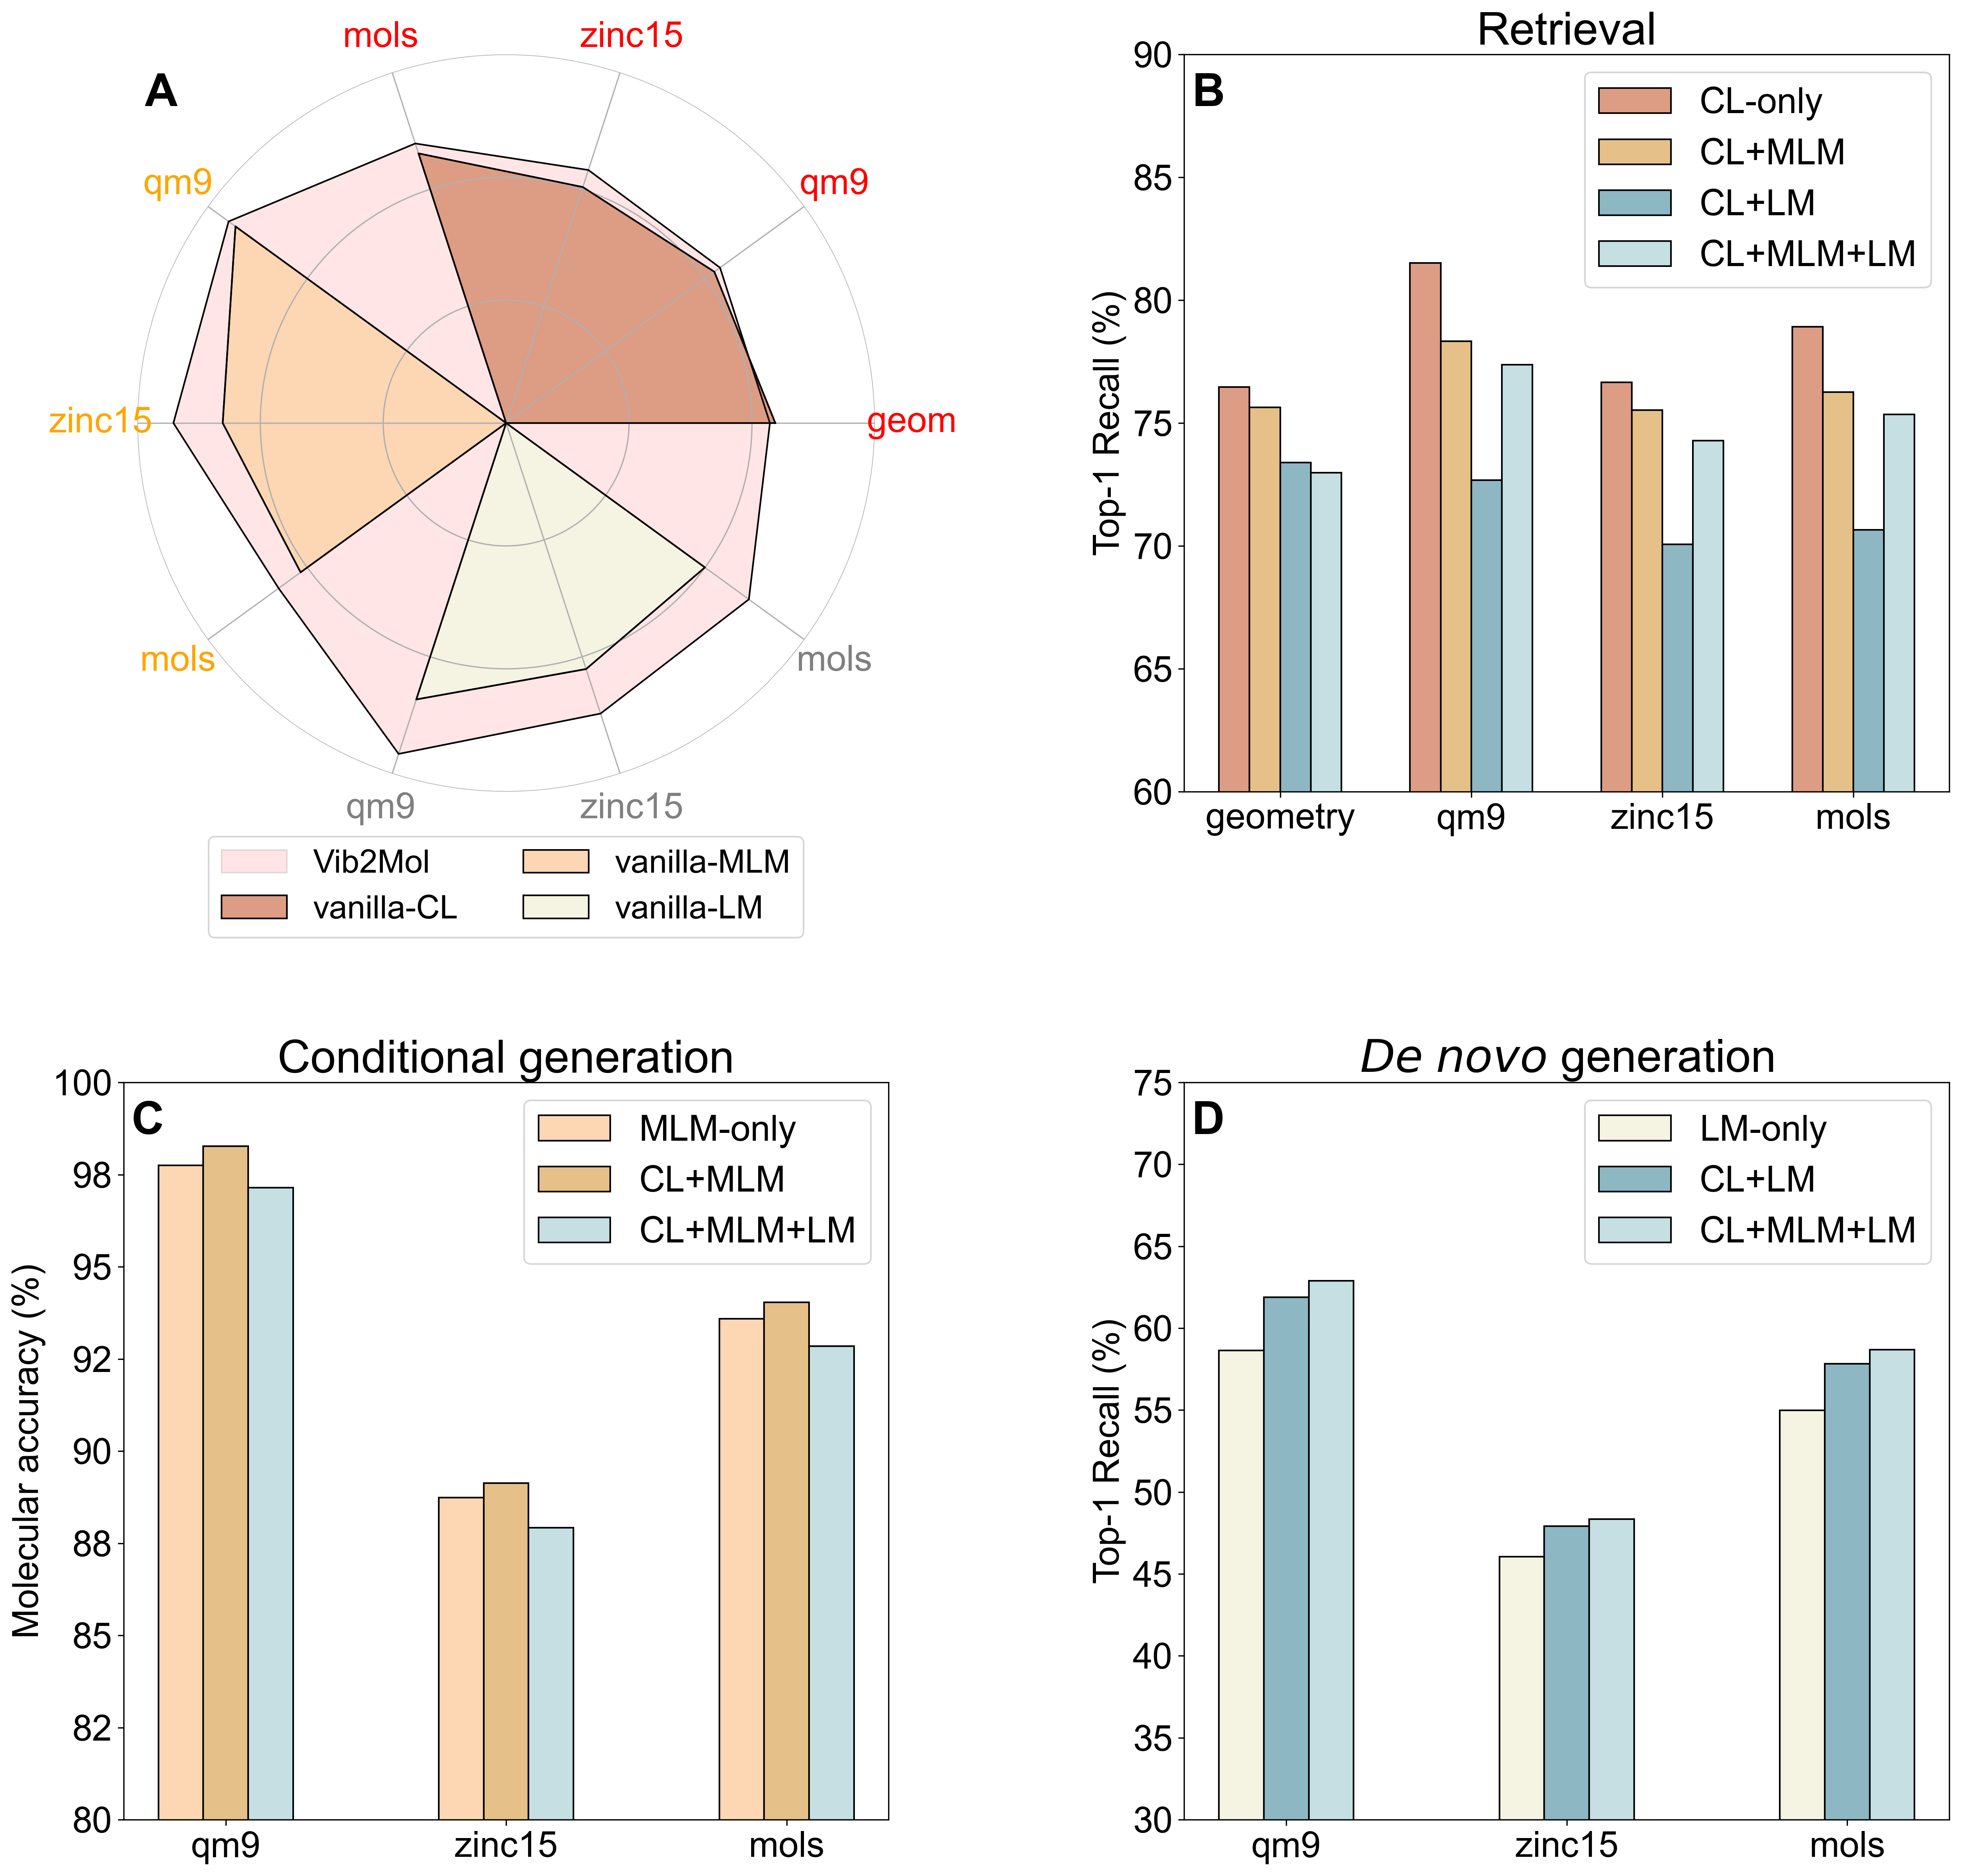

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

font_path = '../appendix/Arial.ttf' 
matplotlib.font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

fontsize_label = 28
fontsize_legend = 22
fontsize_ticks = 22

# 数据准备
labels = [
    'geom',          # spectral matching
    'qm9',    # spectrum-structure retrieval (qm9)
    'zinc15', # spectrum-structure retrieval (zinc15)
    'mols',  # spectrum-structure retrieval (mols)
    'qm9',     # Conditional generation (qm9)
    'zinc15',  # Conditional generation (zinc15)
    'mols',   # Conditional generation (mols)
    'qm9',        # De novo generation (qm9)
    'zinc15',     # De novo generation (zinc15)
    'mols'       # De novo generation (mols)
]
label_colors = ['red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'gray', 'gray', 'gray']

def y_formatter(value, pos):
    return f"{value:.0f}"


def close_values(values):
    return values + values[:1]
    
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

        
#==================== polar plot ====================

values_arr = np.array([[76.9, 80.94, 75.19, 78.07, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 97.22, 83.06, 90.67, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 58.65, 46.05, 54.99],
                       [76.46, 81.51, 76.65, 78.92, 97.91, 87.07, 92.88, 63.31, 49.86, 59.41],])


values_arr[:, 0] += 15  # spec. match
values_arr[:, 1] += 10  # spec.-str. match (qm9)
values_arr[:, 2] += 15  # spec.-str. match (zinc15)
values_arr[:, 3] += 15  # spec.-str. match (mols)

values_arr[:, 5] += 10  # con. gen (zinc15)
values_arr[:, 7] += 35  # de novo (qm9)
values_arr[:, 8] += 45  # de novo (zinc15)
values_arr[:, 9] += 35  # de novo (mols)

values_arr[values_arr <= 70] = 70

values_cl = values_arr[0].tolist()
values_mlm = values_arr[1].tolist()
values_lm = values_arr[2].tolist()
values_v2m = values_arr[3].tolist()

colors_dict = {'cl':'#DD9C84',
               'mlm':'#FDD6B3',
               'lm':'#F5F3E1',
               'cl_mlm':'#E5C088',
               'cl_lm':'#8DB7C3',
               'cl_mlm_lm':'#C5DFE2',
               'cl_mlm_lm_spt':'purple',
               'v2m':'red'
               }
                    

polar_cl = close_values(values_cl)
polar_mlm = close_values(values_mlm)
polar_lm = close_values(values_lm)
polar_v2m = close_values(values_v2m)


# create the figure

height_ratios = [1, 0.01, 1]
width_ratios=[1, 0.1, 1]
gs = gridspec.GridSpec(3, 3, height_ratios=height_ratios, width_ratios=width_ratios)

step = 8
fig = plt.figure(figsize=(step*sum(width_ratios), step*sum(height_ratios)), dpi=300)

# subplot1
polar_ax = fig.add_subplot(gs[0, 0], polar=True)

plt.text(0.01, 0.93, 'A', fontsize=fontsize_label, transform=plt.gca().transAxes, fontweight='bold')

polar_ax.plot(angles, polar_v2m, linewidth=1, linestyle='solid', color='black')
polar_ax.fill(angles, polar_v2m, color=colors_dict['v2m'], alpha=0.1, label='Vib2Mol', edgecolor='black')
# polar_ax.fill(angles, polar_v2m, color=colors_dict['v2m'], alpha=0.0, label='Vib2Mol', edgecolor='black')

polar_ax.plot(angles, polar_cl, linewidth=1, linestyle='solid', color='black')
polar_ax.fill(angles, polar_cl, color=colors_dict['cl'], label='vanilla-CL', edgecolor='black')

polar_ax.plot(angles, polar_mlm, linewidth=1, linestyle='solid', color='black')
polar_ax.fill(angles, polar_mlm, color=colors_dict['mlm'], label='vanilla-MLM', edgecolor='black')

polar_ax.plot(angles, polar_lm, linewidth=1, linestyle='solid', color='black')
polar_ax.fill(angles, polar_lm, color=colors_dict['lm'], label='vanilla-LM', edgecolor='black')


# set the labels
polar_ax.set_ylim(70, 100)
polar_ax.set_rgrids([70, 80, 90, 100], labels=['', '', '', ' '], angle=0, fontsize=fontsize_ticks)
polar_ax.set_xticks(angles[:-1])
polar_ax.set_xticklabels(['' for _ in range(len(labels))], fontsize=fontsize_ticks)
polar_ax.spines['polar'].set_visible(False)

for i in range(len(labels)):
    polar_ax.text(angles[i], 103, labels[i], fontsize=22, ha='center', va='center', color=label_colors[i])

polar_ax.legend(loc='lower center', fontsize=20, ncol=2, bbox_to_anchor=(0.5, -0.22))

# ========================================  bar plots ========================================
        
values_arr = np.array([[76.46, 81.51, 76.65, 78.92, 0, 0, 0, 0, 0, 0], # cl
                       [0, 0, 0, 0, 97.75, 88.74, 93.59, 0, 0, 0], # mlm
                       [0, 0, 0, 0, 0, 0, 0, 58.65, 46.05, 54.99], #lm
                       [75.63, 78.33, 75.53, 76.26, 98.27, 89.13, 94.03, 0, 0, 0], # cl_mlm
                       [73.39, 72.67, 70.07, 70.66, 0, 0, 0, 61.89, 47.91, 57.84], # cl_lm
                       [72.98, 77.38, 74.29, 75.35, 97.14, 87.92, 92.85, 62.89, 48.34, 58.68], # cl_mlm_lm
                       [76.46, 81.51, 76.65, 78.92, 97.91, 87.04, 92.88, 60.63, 47.68, 56.88], # cl_mlm_lm_spt
                       [76.46, 81.51, 76.65, 78.92, 97.91, 87.04, 92.88, 63.31, 49.86, 59.41], # cl_mlm_lm_spt_rr
                       ])


# subplot2（Spectral matching）
ax2 = fig.add_subplot(gs[0, 2])  
width = 0.16  

bars1 = ax2.bar(np.arange(4) -  0.5 * width, values_arr[0, :4], width, edgecolor='black', label='CL-only', color=colors_dict['cl'])
bars2 = ax2.bar(np.arange(4) + 0.5 * width, values_arr[3, :4], width, edgecolor='black', label='CL+MLM', color=colors_dict['cl_mlm'])
bars3 = ax2.bar(np.arange(4) + 1.5 * width, values_arr[4, :4], width, edgecolor='black', label='CL+LM', color=colors_dict['cl_lm'])
bars4 = ax2.bar(np.arange(4) + 2.5 * width, values_arr[5, :4], width, edgecolor='black', label='CL+MLM+LM', color=colors_dict['cl_mlm_lm'])


ax2.set_title('Retrieval', fontsize=fontsize_label)
ax2.set_ylabel('Top-1 Recall (%)', fontsize=fontsize_ticks)
ax2.set_ylim(60,90)
ax2.set_xticks(np.arange(4) + width)
ax2.tick_params(axis='y', labelsize=fontsize_ticks)
ax2.set_xticklabels(['geometry', 
                     'qm9', 
                     'zinc15',
                     'mols'], rotation=0, fontsize=fontsize_ticks)
ax2.legend(fontsize=fontsize_legend)
ax2.text(0.01, 0.93, 'B', fontsize=fontsize_label, transform=plt.gca().transAxes, fontweight='bold')

# subplot3（Conditional generation）
ax3 = fig.add_subplot(gs[2, 0]) 

bars1 = ax3.bar(np.arange(3), values_arr[1, 4:7], width, edgecolor='black', label='MLM-only', color=colors_dict['mlm'])
bars2 = ax3.bar(np.arange(3) + width, values_arr[3, 4:7], width, edgecolor='black', label='CL+MLM', color=colors_dict['cl_mlm'])
bars3 = ax3.bar(np.arange(3) + 2*width, values_arr[5, 4:7], width, edgecolor='black', label='CL+MLM+LM', color=colors_dict['cl_mlm_lm'])


ax3.set_title('Conditional generation', fontsize=fontsize_label)
ax3.set_ylabel('Molecular accuracy (%)', fontsize=fontsize_ticks)
ax3.set_ylim(80, 100)
ax3.set_xticks(np.arange(3) + width)
ax3.tick_params(axis='y', labelsize=fontsize_ticks)
ax3.set_xticklabels(['qm9', 
                     'zinc15',
                     'mols'], rotation=0, fontsize=fontsize_ticks)
ax3.legend(fontsize=fontsize_legend)
ax3.text(0.01, 0.93, 'C', fontsize=fontsize_label, transform=plt.gca().transAxes, fontweight='bold')
ax3.yaxis.set_major_formatter(FuncFormatter(y_formatter))


# subplot4（De novo generation）
ax4 = fig.add_subplot(gs[2, 2])  

bars1 = ax4.bar(np.arange(3), values_arr[2, -3:], width, edgecolor='black', label='LM-only', color=colors_dict['lm'],)
bars2 = ax4.bar(np.arange(3) + width, values_arr[4, -3:], width, edgecolor='black', label='CL+LM', color=colors_dict['cl_lm'])
bars3 = ax4.bar(np.arange(3) + 2* width, values_arr[5, -3:], width, edgecolor='black', label='CL+MLM+LM', color=colors_dict['cl_mlm_lm'])

fontsize_label = 28
fontsize_legend = 22
fontsize_ticks = 22

ax4.set_title('$De$ $novo$ generation', fontsize=fontsize_label)
ax4.set_ylabel('Top-1 Recall (%)', fontsize=fontsize_ticks)
ax4.set_ylim(30,75)
ax4.tick_params(axis='y', labelsize=fontsize_ticks)
ax4.set_xticks(np.arange(3) + width)
ax4.set_xticklabels(['qm9', 
                     'zinc15',
                     'mols'], rotation=0, fontsize=fontsize_ticks)
ax4.legend(fontsize=fontsize_legend)
ax4.text(0.01, 0.93, 'D', fontsize=fontsize_label, transform=plt.gca().transAxes, fontweight='bold')

plt.tight_layout()
# plt.savefig('../SI/metrics.svg',  format='svg', dpi=300)

# figure 3

In [3]:
# in `eval_tsne.ipynb`

# figure s1

In [4]:
import os 
from tqdm import tqdm
import numpy as np
import pickle

with open('../appendix/loss_grad.pkl', 'rb') as f:
    loss_grad_dict = pickle.load(f)

total_loss_list = loss_grad_dict['total_loss']
cl_loss_list = loss_grad_dict['cl_loss']
mlm_loss_list = loss_grad_dict['mlm_loss']
lm_loss_list = loss_grad_dict['lm_loss']

total_grad_list = loss_grad_dict['total_grad']
cl_grad_list = loss_grad_dict['cl_grad']
mlm_grad_list = loss_grad_dict['mlm_grad']
lm_grad_list = loss_grad_dict['lm_grad']

epoch_list = loss_grad_dict['epoch']

    

In [5]:
import pandas as pd
import numpy as np

def cos_simi(x, y):
    dot_product = np.dot(x, y)
    
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    
    return dot_product / (norm_x * norm_y)
    

def norm_simi(x, y, z):
    
    a_norm = np.linalg.norm(x)
    total_norm = np.linalg.norm(x) + np.linalg.norm(y) + np.linalg.norm(z)
    
    contribution_degree = a_norm / total_norm
    return contribution_degree


df = pd.DataFrame({'epoch':epoch_list, 'total_loss':total_loss_list, 'cl_loss':cl_loss_list, 'mlm_loss':mlm_loss_list, 'lm_loss':lm_loss_list,
                   'total_grad':total_grad_list, 'cl_grad':cl_grad_list, 'mlm_grad':mlm_grad_list, 'lm_grad':lm_grad_list,})

df = df.sort_values(by='epoch').reset_index(drop=True)
df['cl_cos'] = df.apply(lambda row: cos_simi(row['cl_grad'].flatten(), row['total_grad'].flatten()), axis=1)
df['mlm_cos'] = df.apply(lambda row: cos_simi(row['mlm_grad'].flatten(), row['total_grad'].flatten()), axis=1)
df['lm_cos'] = df.apply(lambda row: cos_simi(row['lm_grad'].flatten(), row['total_grad'].flatten()), axis=1)

df['cl_norm'] = df.apply(lambda row: norm_simi(row['cl_grad'].flatten(), row['mlm_grad'].flatten(), row['lm_grad'].flatten()), axis=1)
df['mlm_norm'] = df.apply(lambda row: norm_simi(row['mlm_grad'].flatten(), row['cl_grad'].flatten(), row['lm_grad'].flatten()), axis=1)
df['lm_norm'] = df.apply(lambda row: norm_simi(row['lm_grad'].flatten(), row['cl_grad'].flatten(), row['mlm_grad'].flatten()), axis=1)
df = df.fillna(0)

df['group'] = df['epoch'] // 200 + 1


/var/folders/1j/7pqn40651hvgyt1913gz84880000gn/T/ipykernel_73619/2034139137.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return dot_product / (norm_x * norm_y)


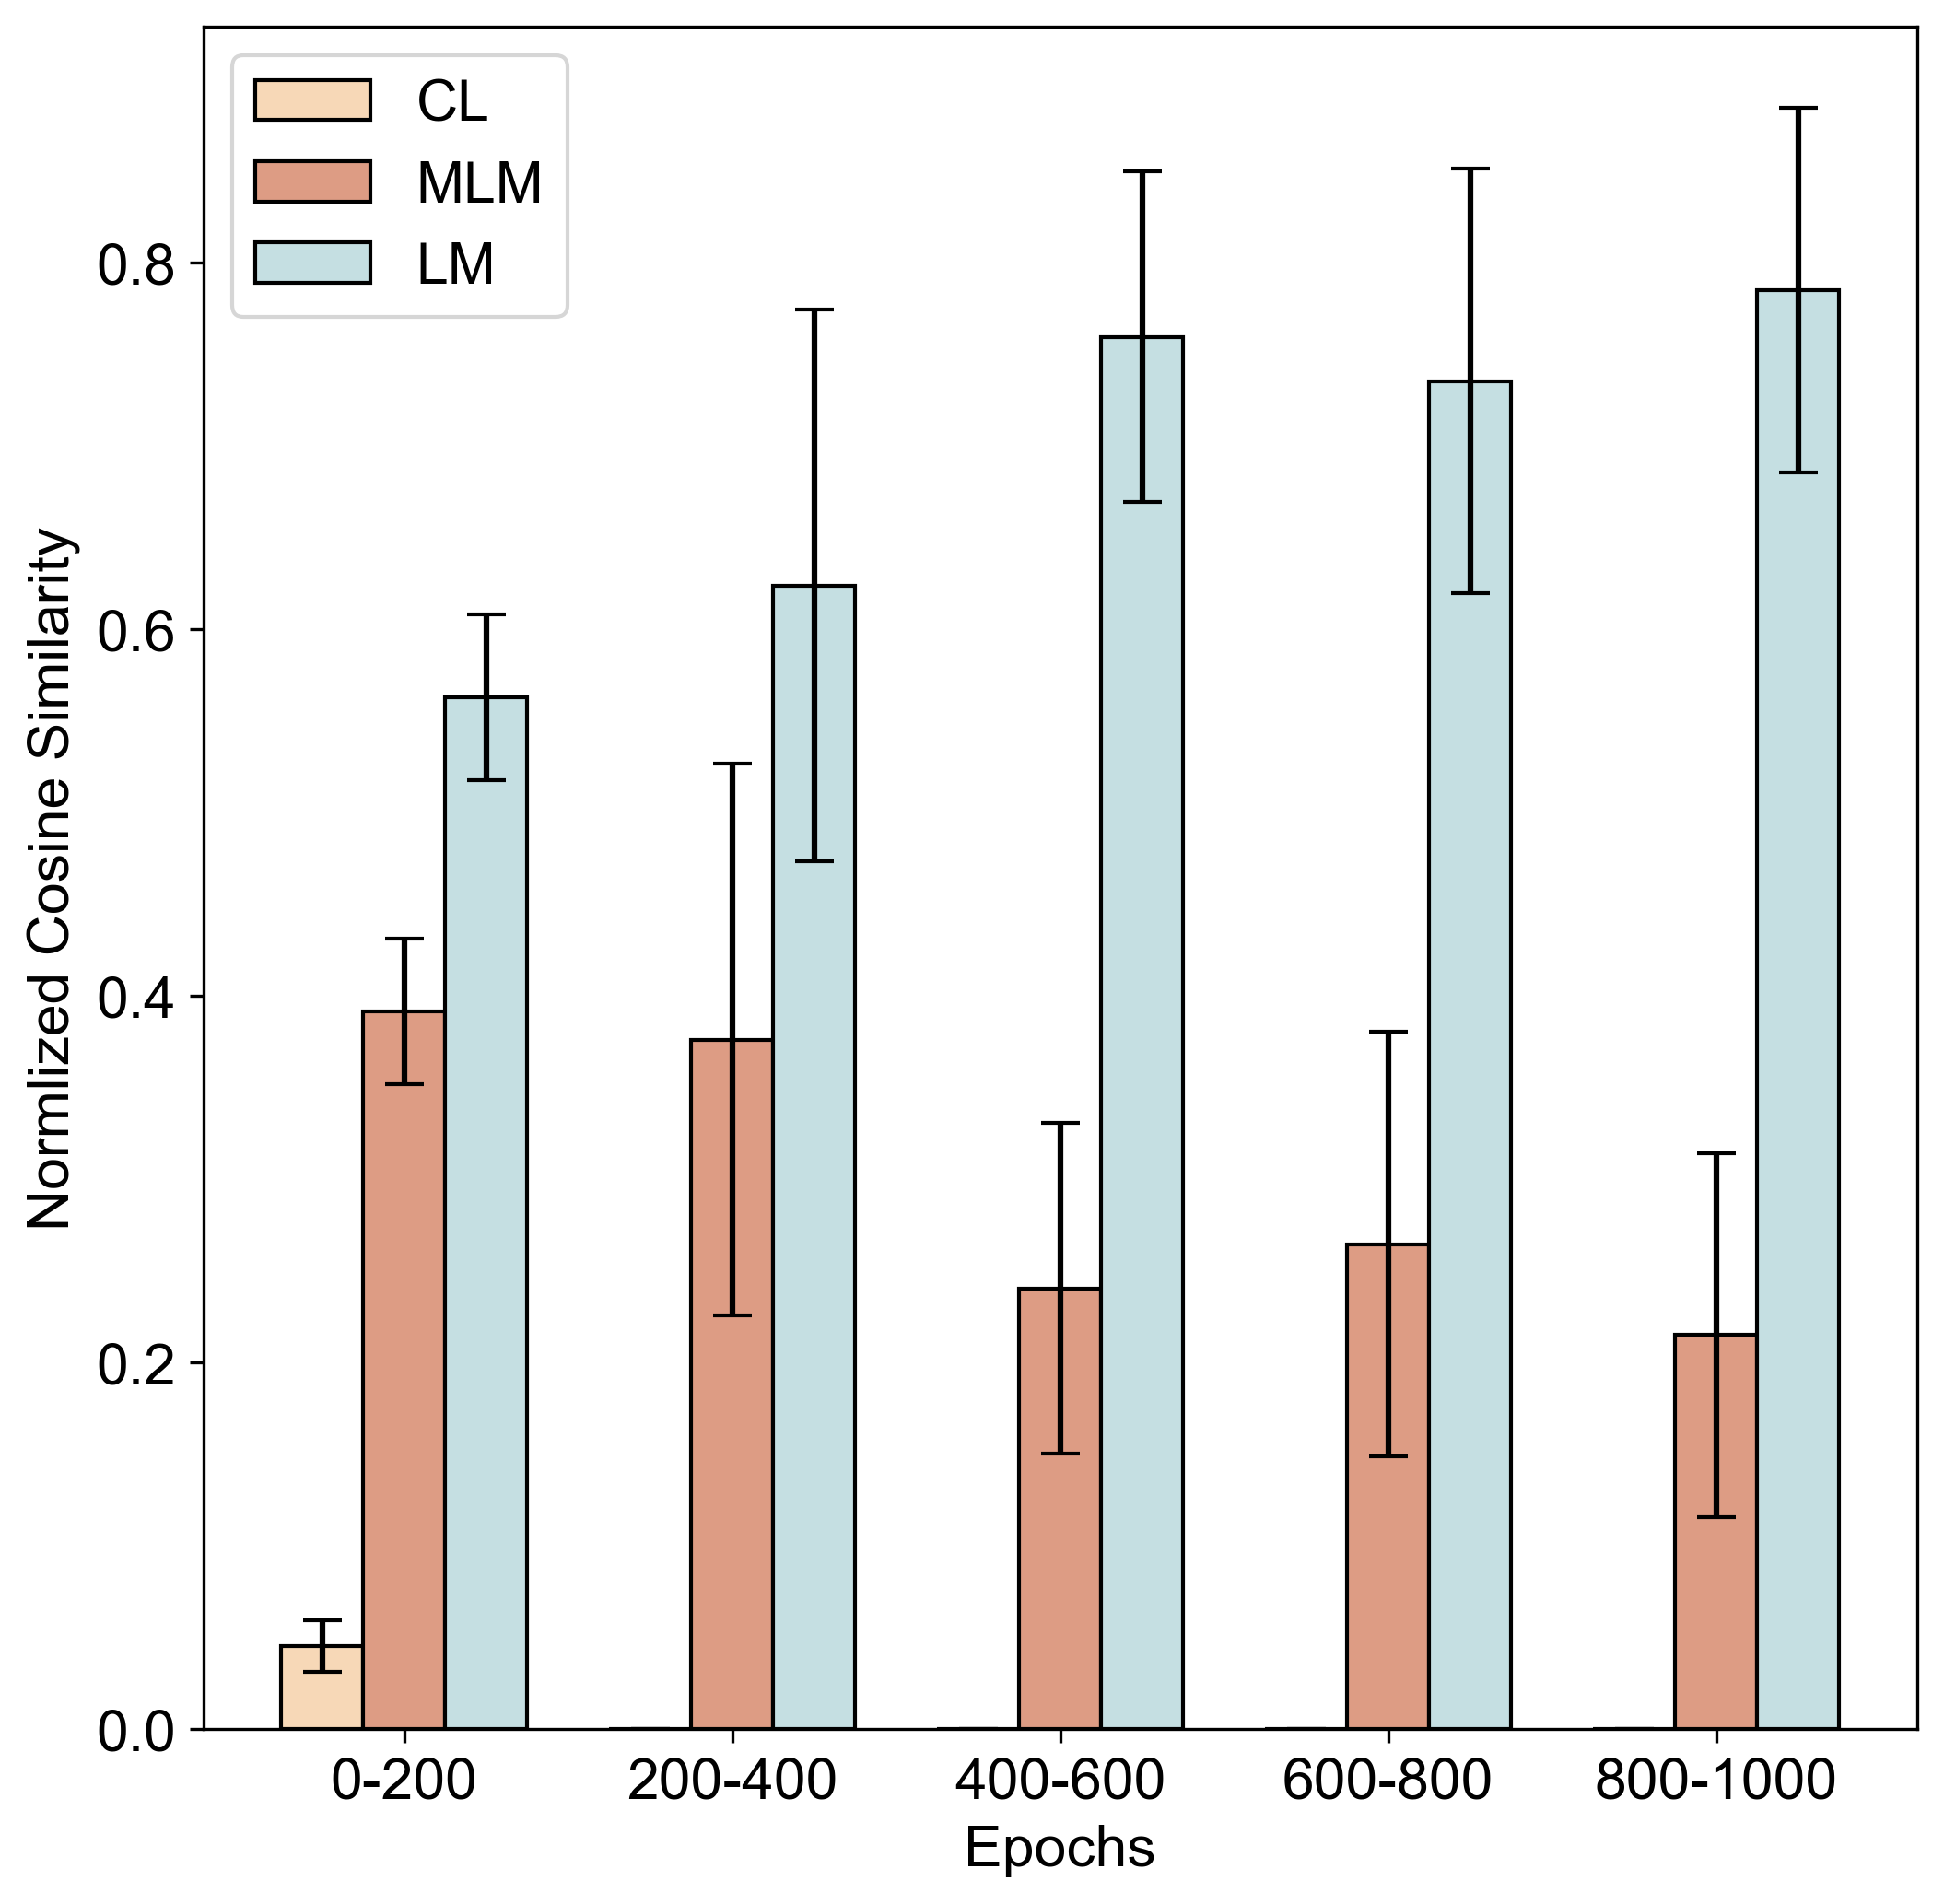

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font_path = '../appendix/Arial.ttf' 
matplotlib.font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'


# groupby 
result = df.groupby('group')[['cl_norm', 'mlm_norm', 'lm_norm']].agg(['mean', 'var']).reset_index()
result = result.fillna(0)
result[(result == -np.inf)|(result == np.inf)] = 0


# extract data
groups = result['group']
cl_means = result['cl_norm']['mean']
cl_errors = result['cl_norm']['var']
mlm_means = result['mlm_norm']['mean']
mlm_errors = result['mlm_norm']['var']
lm_means = result['lm_norm']['mean']
lm_errors = result['lm_norm']['var']

# set the width of the bars
bar_width = 0.25  
x = np.arange(len(groups))  

# plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
ax.bar(x - bar_width, cl_means, width=bar_width, yerr=cl_errors, label='CL', capsize=5, color='#F7D8B7', edgecolor='black')
ax.bar(x, mlm_means, width=bar_width, yerr=mlm_errors, label='MLM', capsize=5, color='#DD9C84', edgecolor='black')
ax.bar(x + bar_width, lm_means, width=bar_width, yerr=lm_errors, label='LM', capsize=5, color='#C5DFE2', edgecolor='black')

# set labels
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Normlized Cosine Similarity', fontsize=15)
ax.set_xticks(x)
ax.tick_params(axis='y', labelsize=15)  
ax.set_xticklabels(['0-200', '200-400', '400-600', '600-800', '800-1000'], fontsize=15)
ax.legend(fontsize=15)

# plt.savefig('../SI/grads.svg',  format='svg')

# figure s2

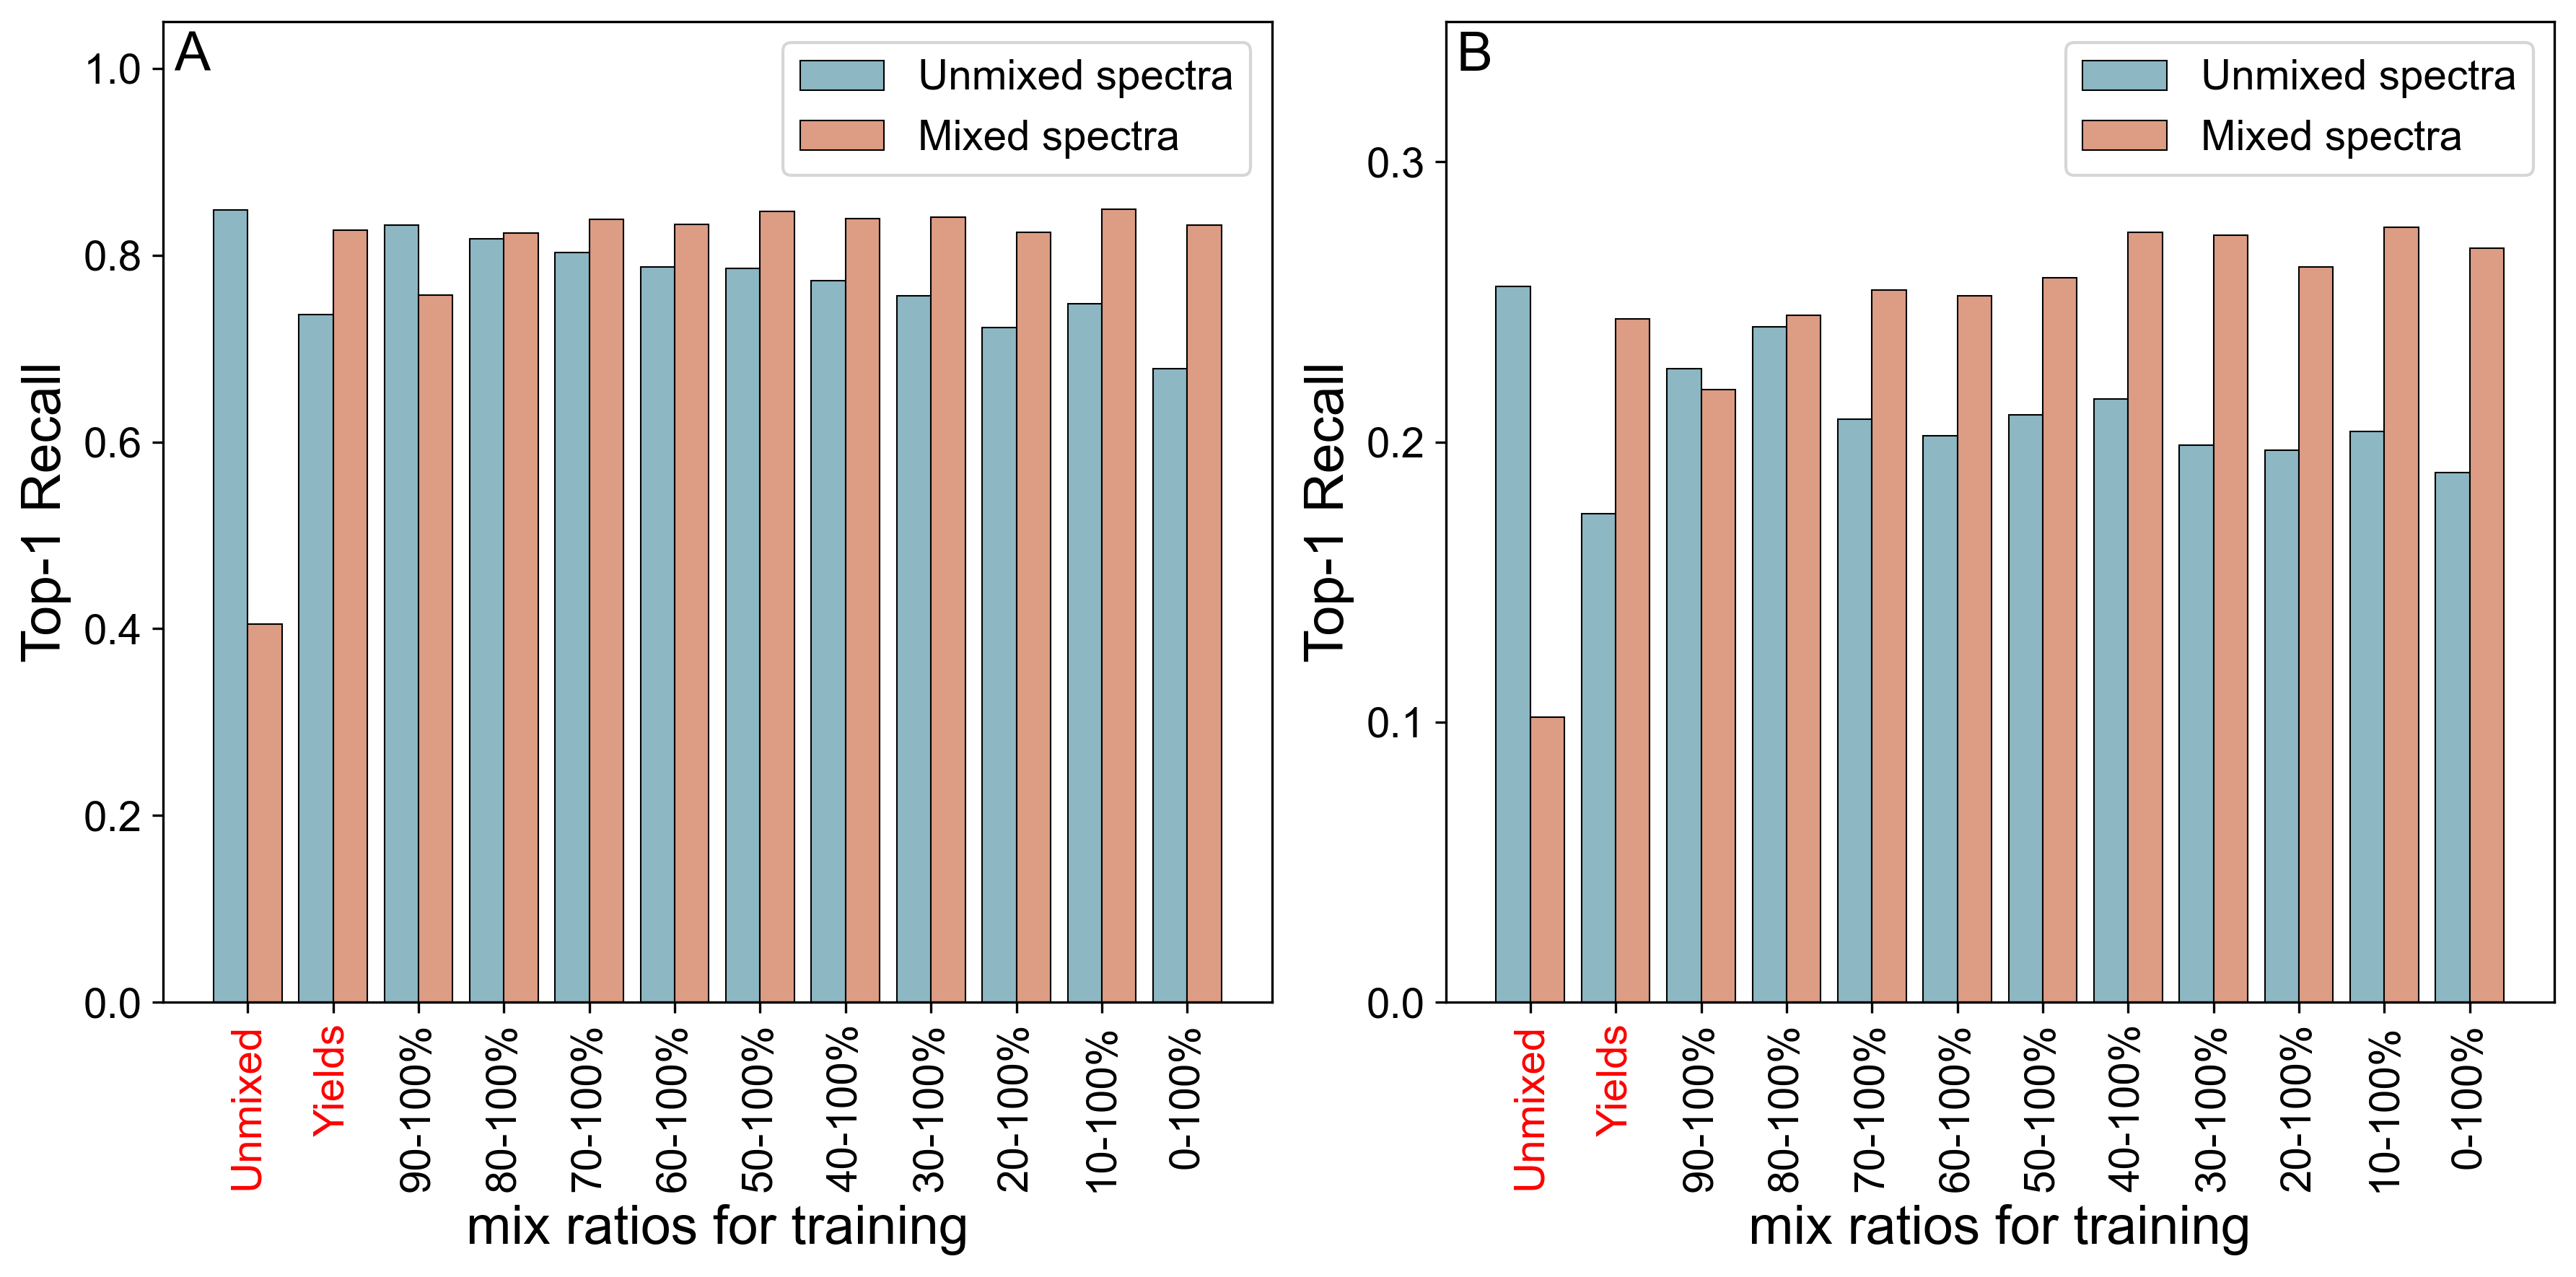

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font_path = '../appendix/Arial.ttf' 
matplotlib.font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

fontsize_label = 18
fontsize_legend = 14
fontsize_ticks = 14
width = 0.4


cl_mix = [0.40473, 0.82699, 0.75735, 0.82385, 0.83824, 0.83312, 0.84687, 0.83887, 0.84079, 0.82481, 0.8491, 0.83179]
cl_pure = [0.84874, 0.73649, 0.83211, 0.81772, 0.80301, 0.78702, 0.78574, 0.77295, 0.75664, 0.72274, 0.74832, 0.67861]

beams_mix = [0.10166, 0.24400, 0.21867, 0.2452, 0.25416, 0.25224, 0.25863, 0.27494, 0.27366, 0.26247, 0.27653, 0.26927]
beams_pure = [0.25552, 0.17429, 0.22610, 0.24113, 0.20819, 0.20211, 0.20979, 0.21522, 0.19891, 0.19699, 0.20371, 0.18900]

plt.figure(figsize=(12, 6), dpi=300)

plt.subplot(121)
plt.bar(np.arange(12)-width/2, cl_pure, width=width, label='Unmixed spectra', color='#8DB7C3', edgecolor='black', linewidth=0.5)
plt.bar(np.arange(12)+width/2, cl_mix, width=width, label='Mixed spectra', color='#DD9C84', edgecolor='black', linewidth=0.5)

plt.ylim(0, 1.05)
plt.yticks(fontsize=fontsize_ticks)
plt.xticks(np.arange(12), ['Unmixed', 'Yields', '90-100%', '80-100%', '70-100%', '60-100%', '50-100%', '40-100%', '30-100%', '20-100%', '10-100%', '0-100%'], 
           rotation=90, fontsize=fontsize_ticks)
plt.legend(loc='upper right', fontsize=fontsize_legend)
plt.ylabel('Top-1 Recall', fontsize=fontsize_label)
plt.xlabel('mix ratios for training', fontsize=fontsize_label)

xtick_labels = plt.gca().get_xticklabels()

# modify the properties of the first two tick labels
for i in range(2):  
    xtick_labels[i].set_color('red')  # set to red
# plt.hlines(cl_pure[-1], -0.5, 11.5, linestyles='dashed', label='train with yields')
# plt.hlines(cl_mix[-1], -0.5, 11.5, linestyles='dashed', label='train with yields')

plt.text(0.01, 0.95, 'A', fontsize=fontsize_label, transform=plt.gca().transAxes)

plt.subplot(122)
plt.bar(np.arange(12)-width/2, beams_pure, width=width, label='Unmixed spectra', color='#8DB7C3', edgecolor='black', linewidth=0.5)
plt.bar(np.arange(12)+width/2, beams_mix, width=width, label='Mixed spectra', color='#DD9C84', edgecolor='black', linewidth=0.5)

plt.ylim(0, 0.35)
plt.yticks(np.arange(0, 0.32, 0.1), fontsize=fontsize_ticks)
plt.xticks(np.arange(12), ['Unmixed', 'Yields', '90-100%', '80-100%', '70-100%', '60-100%', '50-100%', '40-100%', '30-100%', '20-100%', '10-100%', '0-100%'], 
           rotation=90, fontsize=fontsize_ticks)
plt.legend(loc='upper right', fontsize=fontsize_legend)
plt.ylabel('Top-1 Recall', fontsize=fontsize_label)
plt.xlabel('mix ratios for training', fontsize=fontsize_label)
# plt.hlines(0.24400, -0.5, 10.5, linestyles='dashed', label='train with yields')
plt.text(0.01, 0.95, 'B', fontsize=fontsize_label, transform=plt.gca().transAxes)

xtick_labels = plt.gca().get_xticklabels()

# modify the properties of the first two tick labels
for i in range(2):  
    xtick_labels[i].set_color('red')  
    
plt.tight_layout()
# plt.savefig('../SI/rxn.svg', format='svg')

# figure s3

In [8]:
import lmdb
import pandas as pd
import pickle
import numpy as np

db = lmdb.open('../datasets/vibench/rxn/rxn_test.lmdb', subdir=False, lock=False, map_size=int(1e11))

# Open a transaction and perform a read operation
with db.begin() as txn:
    test_data = list(txn.cursor())

test_df = pd.DataFrame([pickle.loads(item[1]) for item in test_data])

In [9]:
def mix_spectrum(row):
    spec_r1 = np.array(row['reactant1_raman'])
    spec_r2 = np.array(row['reactant2_raman'])
    spec_p = np.array(row['product_raman'])
    weight = row['Yield']
    return (0.5-0.5*weight) * (spec_r1 + spec_r2) + weight * spec_p

test_df['mix_raman'] = test_df.apply(lambda row: mix_spectrum(row), axis=1)
test_df = test_df[test_df.Yield <= 1.]

pure_df = pd.read_csv('../appendix/pure_lm.csv')
mix_df = pd.read_csv('../appendix/mix_lm.csv')

pure_df['id'] = pure_df.apply(lambda row: f"{row['tgt_smiles']}_{row['yield']}", axis=1)
mix_df['id'] = mix_df.apply(lambda row: f"{row['tgt_smiles']}_{row['yield']}", axis=1)
test_df['id'] = test_df.apply(lambda row: f"{row['product_kekule_smiles']}_{row['Yield']}", axis=1)
df_merge = pd.merge(pure_df, mix_df, how='inner', on='id')
df_merge = pd.merge(test_df, df_merge, how='inner', on='id')
df_merge.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'tgt_smiles_x', 'tgt_smiles_y', 'rxntype_x', 'rxntype_y', 'yield_x', 'yield_y'], inplace=True)

df_merge['tag'] = df_merge.apply(lambda row: 1 if (row['top_10_x'] == 0 and row['top_10_y'] == 1) else 0, axis=1)
df_merge.groupby('rxntype').mean('top_1_x')[['top_1_x', 'top_1_y', 'top_3_x', 'top_3_y', 'tag']]

,top_1_x,top_1_y,top_3_x,top_3_y,tag
rxntype,,,,,
0.0,0.240989,0.276004,0.345005,0.361483,0.106076
3.0,0.325581,0.293023,0.400000,0.404651,0.120930
4.0,0.140625,0.161458,0.213542,0.234375,0.078125
5.0,0.306452,0.370968,0.397849,0.483871,0.139785
6.0,0.228070,0.274854,0.333333,0.391813,0.163743
7.0,0.265130,0.319885,0.360231,0.389049,0.112392
8.0,0.268900,0.282297,0.358852,0.371292,0.099522


3 O=[N+]([O-])c1ccc(Br)cc1.COc1cc(OC)nc(N)n1>>COc1cc(OC)nc(Nc2ccc([N+](=O)[O-])cc2)n1
4 C[C@H](C=O)c1ccccc1.C=C(C)C(=C)C>>CC1=C(C)C[C@H]([C@@H](C)c2ccccc2)OC1


Text(0.8, 0.1, 'Reactant 1')

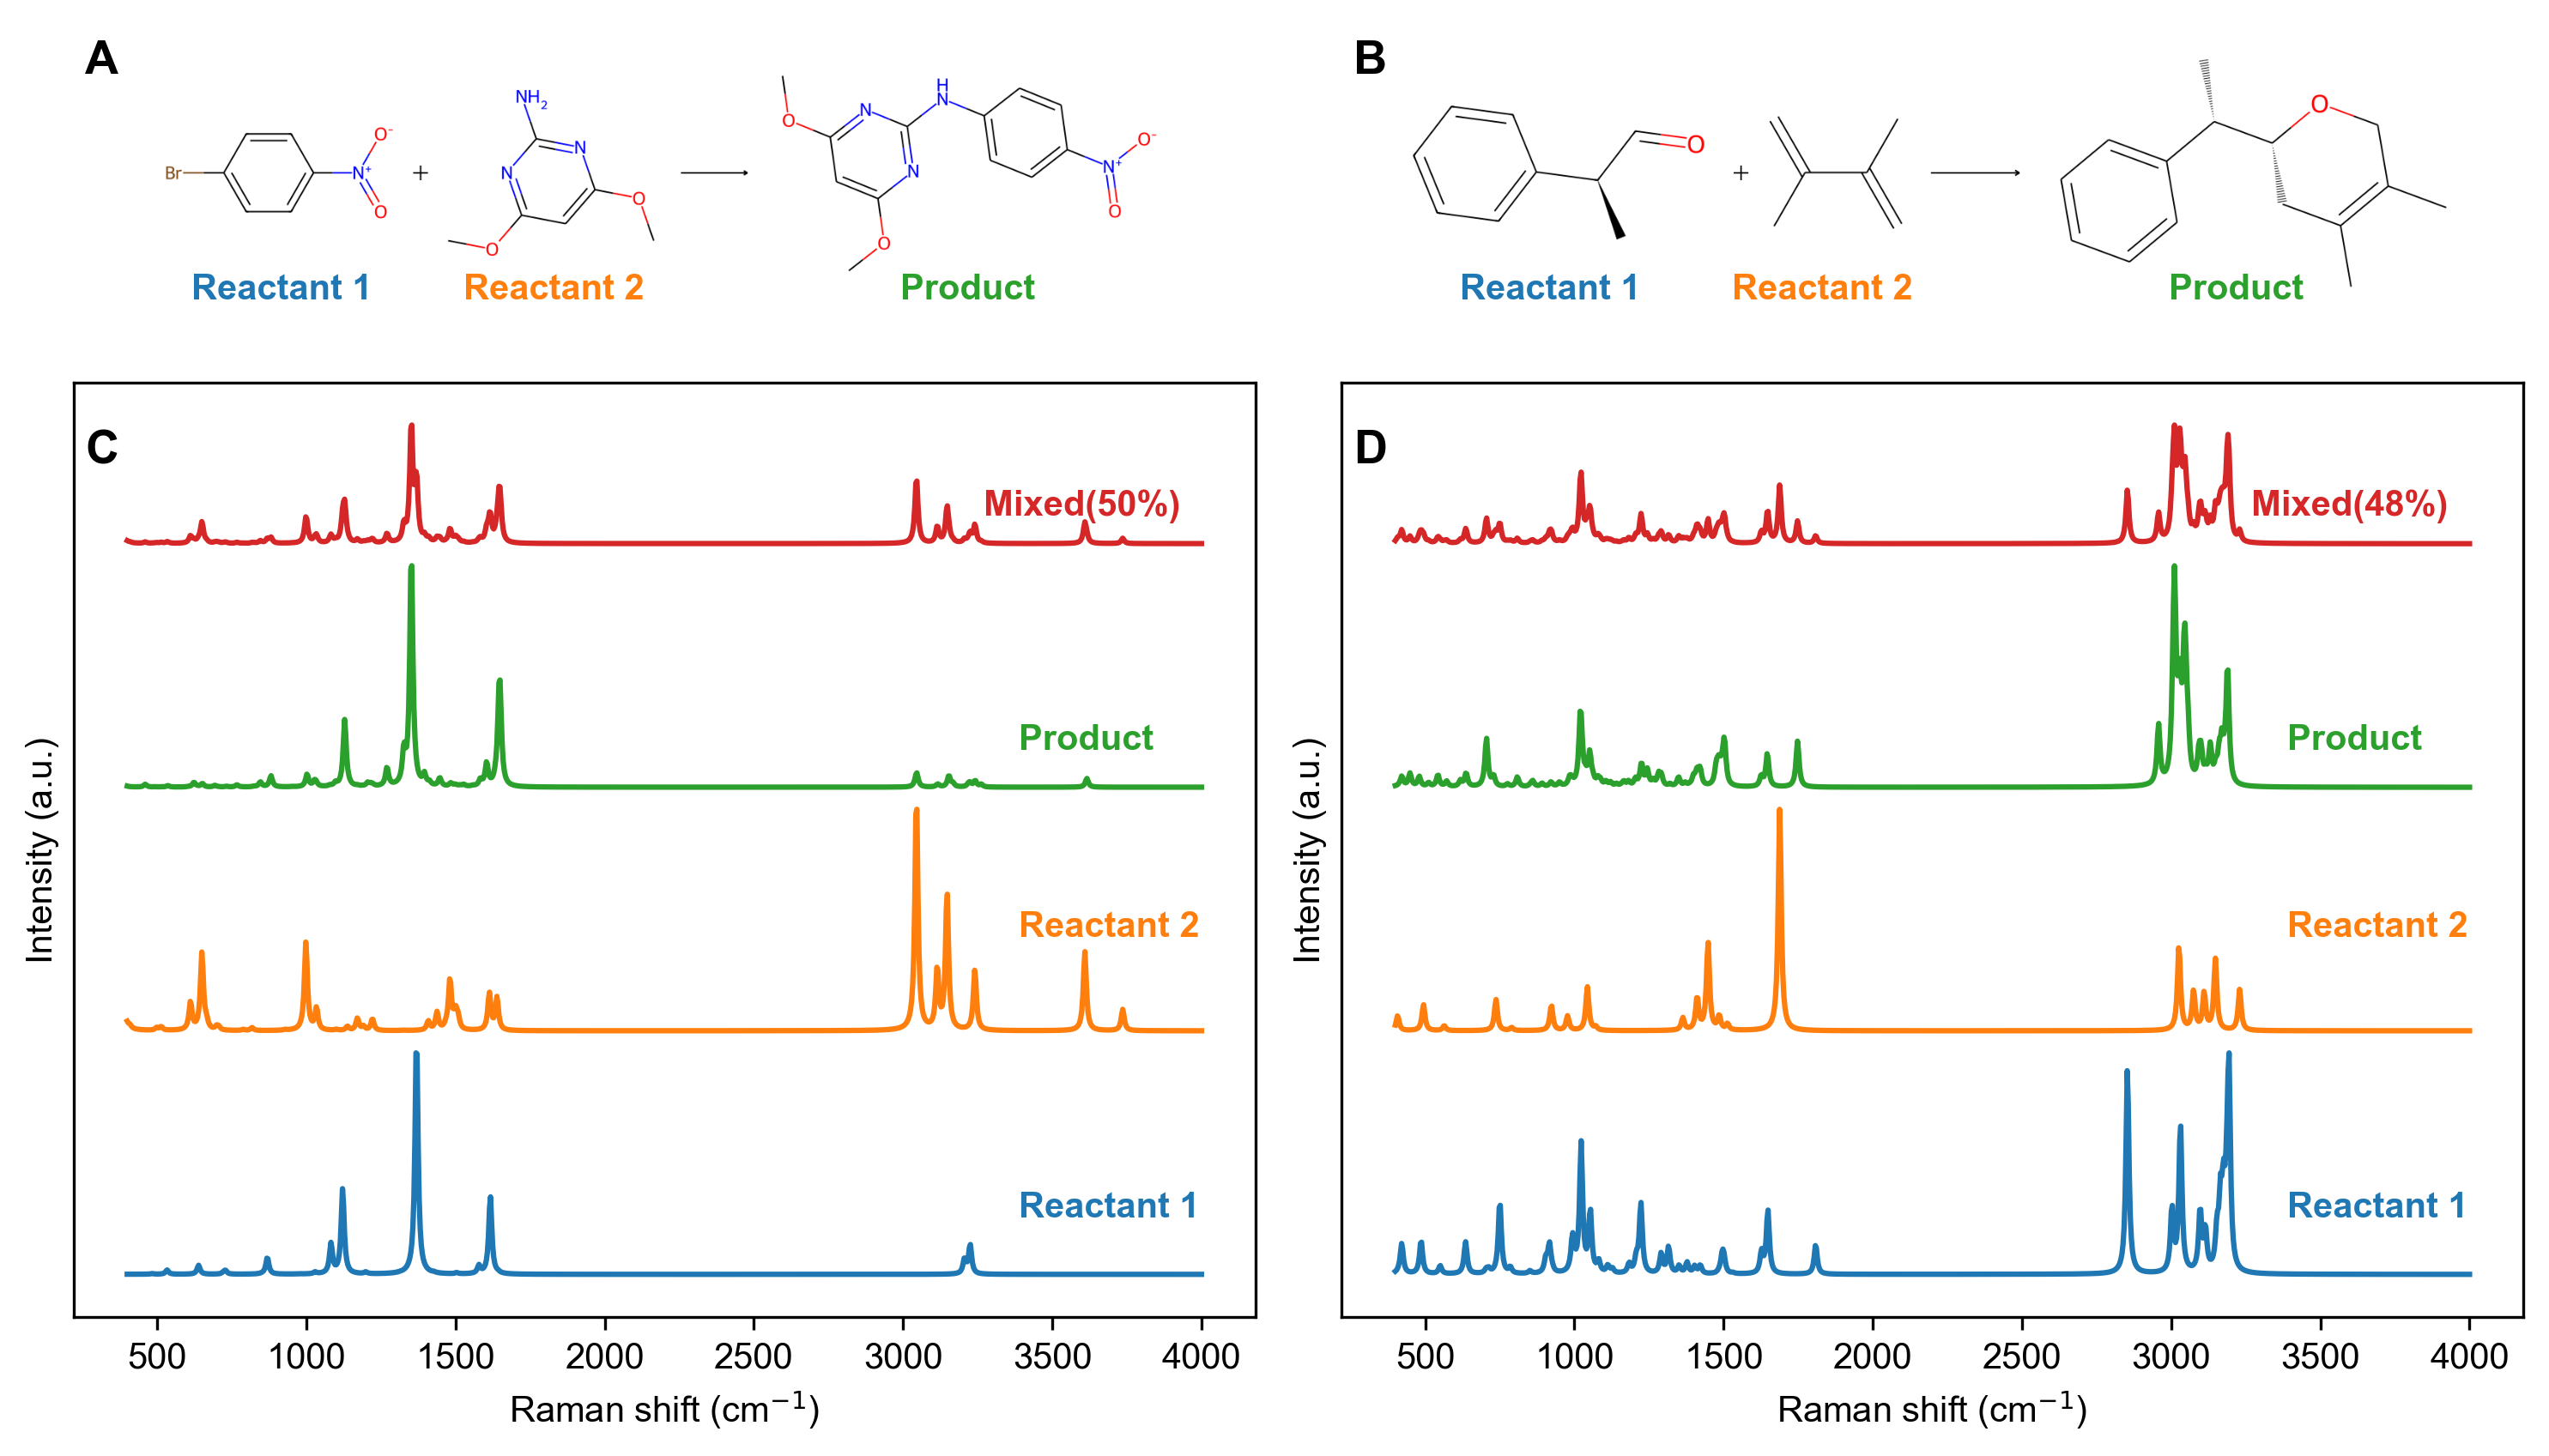

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
font_path = '../appendix/Arial.ttf' 
matplotlib.font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

fontsize = 13


demo_id = 1
demo_df = df_merge[(df_merge.tag == 1) & (df_merge.rxntype == 5) & (df_merge.Yield >= 0.45) & (df_merge.Yield <= 0.5)]
print(len(demo_df), demo_df['rxn_smarts'].iloc[demo_id])

plt.figure(figsize=(10, 7), dpi=300, tight_layout=False)
plt.subplot(221)
reaction = AllChem.ReactionFromSmarts(demo_df['rxn_smarts'].iloc[demo_id], useSmiles=True)
img = Draw.ReactionToImage(reaction, subImgSize=(400, 400), useSVG=False)
plt.imshow(img)
plt.axis('off')
plt.text(0.01, 0.95, 'A', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')
plt.text(0.10, 0.05, 'Reactant 1', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#1f77b4')
plt.text(0.33, 0.05, 'Reactant 2', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#ff7f0e')
plt.text(0.70, 0.05, 'Product', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#2ca02c')

plt.subplot(223)
reactant1_raman = np.array(demo_df['reactant1_raman'].iloc[demo_id])
reactant2_raman = np.array(demo_df['reactant2_raman'].iloc[demo_id])
product_raman = np.array(demo_df['product_raman'].iloc[demo_id])
mix_raman = np.array(demo_df['mix_raman'].iloc[demo_id])
yields = np.array(demo_df['Yield'].iloc[demo_id])

plt.plot(np.linspace(400, 4000, 1024), reactant1_raman, label='reactant1')
plt.plot(np.linspace(400, 4000, 1024), reactant2_raman+1.1, label='reactant2')
plt.plot(np.linspace(400, 4000, 1024), product_raman+2.2, label='product')
plt.plot(np.linspace(400, 4000, 1024), mix_raman+3.3, label=f'yield={yields}')
# plt.legend(loc='upper right')
plt.xlabel('Raman shift (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.text(0.01, 0.95, 'C', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')
plt.text(0.77, 0.85, f'Mixed({yields*100:.0f}%)', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#d62728')
plt.text(0.8, 0.6, f'Product', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#2ca02c')
plt.text(0.8, 0.4, f'Reactant 2', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#ff7f0e')
plt.text(0.8, 0.1, f'Reactant 1', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#1f77b4')

demo_id = 0
demo_df = df_merge[(df_merge.tag == 1) & (df_merge.rxntype == 4) & (df_merge.Yield >= 0.4) & (df_merge.Yield <= 0.8)]
print(len(demo_df), demo_df['rxn_smarts'].iloc[demo_id])
plt.subplot(222)
reaction = AllChem.ReactionFromSmarts(demo_df['rxn_smarts'].iloc[demo_id], useSmiles=True)
img = Draw.ReactionToImage(reaction, subImgSize=(400, 400), useSVG=False)
plt.imshow(img)
plt.axis('off')
plt.text(0.01, 0.95, 'B', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')
plt.text(0.10, 0.05, 'Reactant 1', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#1f77b4')
plt.text(0.33, 0.05, 'Reactant 2', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#ff7f0e')
plt.text(0.70, 0.05, 'Product', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#2ca02c')


plt.subplot(224)
reactant1_raman = np.array(demo_df['reactant1_raman'].iloc[demo_id])
reactant2_raman = np.array(demo_df['reactant2_raman'].iloc[demo_id])
product_raman = np.array(demo_df['product_raman'].iloc[demo_id])
mix_raman = np.array(demo_df['mix_raman'].iloc[demo_id])
yields = np.array(demo_df['Yield'].iloc[demo_id])

plt.plot(np.linspace(400, 4000, 1024), reactant1_raman, label='reactant1')
plt.plot(np.linspace(400, 4000, 1024), reactant2_raman+1.1, label='reactant2')
plt.plot(np.linspace(400, 4000, 1024), product_raman+2.2, label='product')
plt.plot(np.linspace(400, 4000, 1024), mix_raman+3.3, label=f'yield={yields}')
# plt.legend(loc='upper right')
plt.xlabel('Raman shift (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.yticks([])
plt.text(0.01, 0.95, 'D', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')
plt.text(0.77, 0.85, f'Mixed({yields*100:.0f}%)', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#d62728')
plt.text(0.8, 0.6, f'Product', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#2ca02c')
plt.text(0.8, 0.4, f'Reactant 2', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#ff7f0e')
plt.text(0.8, 0.1, f'Reactant 1', transform=plt.gca().transAxes, fontsize=10, fontweight='bold',va='bottom', color='#1f77b4')

# plt.savefig('SI/figure_rxn.svg', format='svg')

# figure s4

In [11]:
import lmdb
import pickle
import pandas as pd
from tqdm import tqdm

db = lmdb.open('../datasets/vibench/nist_ir/nist_ir_train.lmdb', subdir=False, lock=False, map_size=int(1e11))
with db.begin() as txn:
    data_train = list(txn.cursor())

train_df = pd.DataFrame([pickle.loads(item[1]) for item in tqdm(data_train)])

100%|██████████| 9055/9055 [00:00<00:00, 63830.00it/s]


Text(0.01, 0.95, 'C')

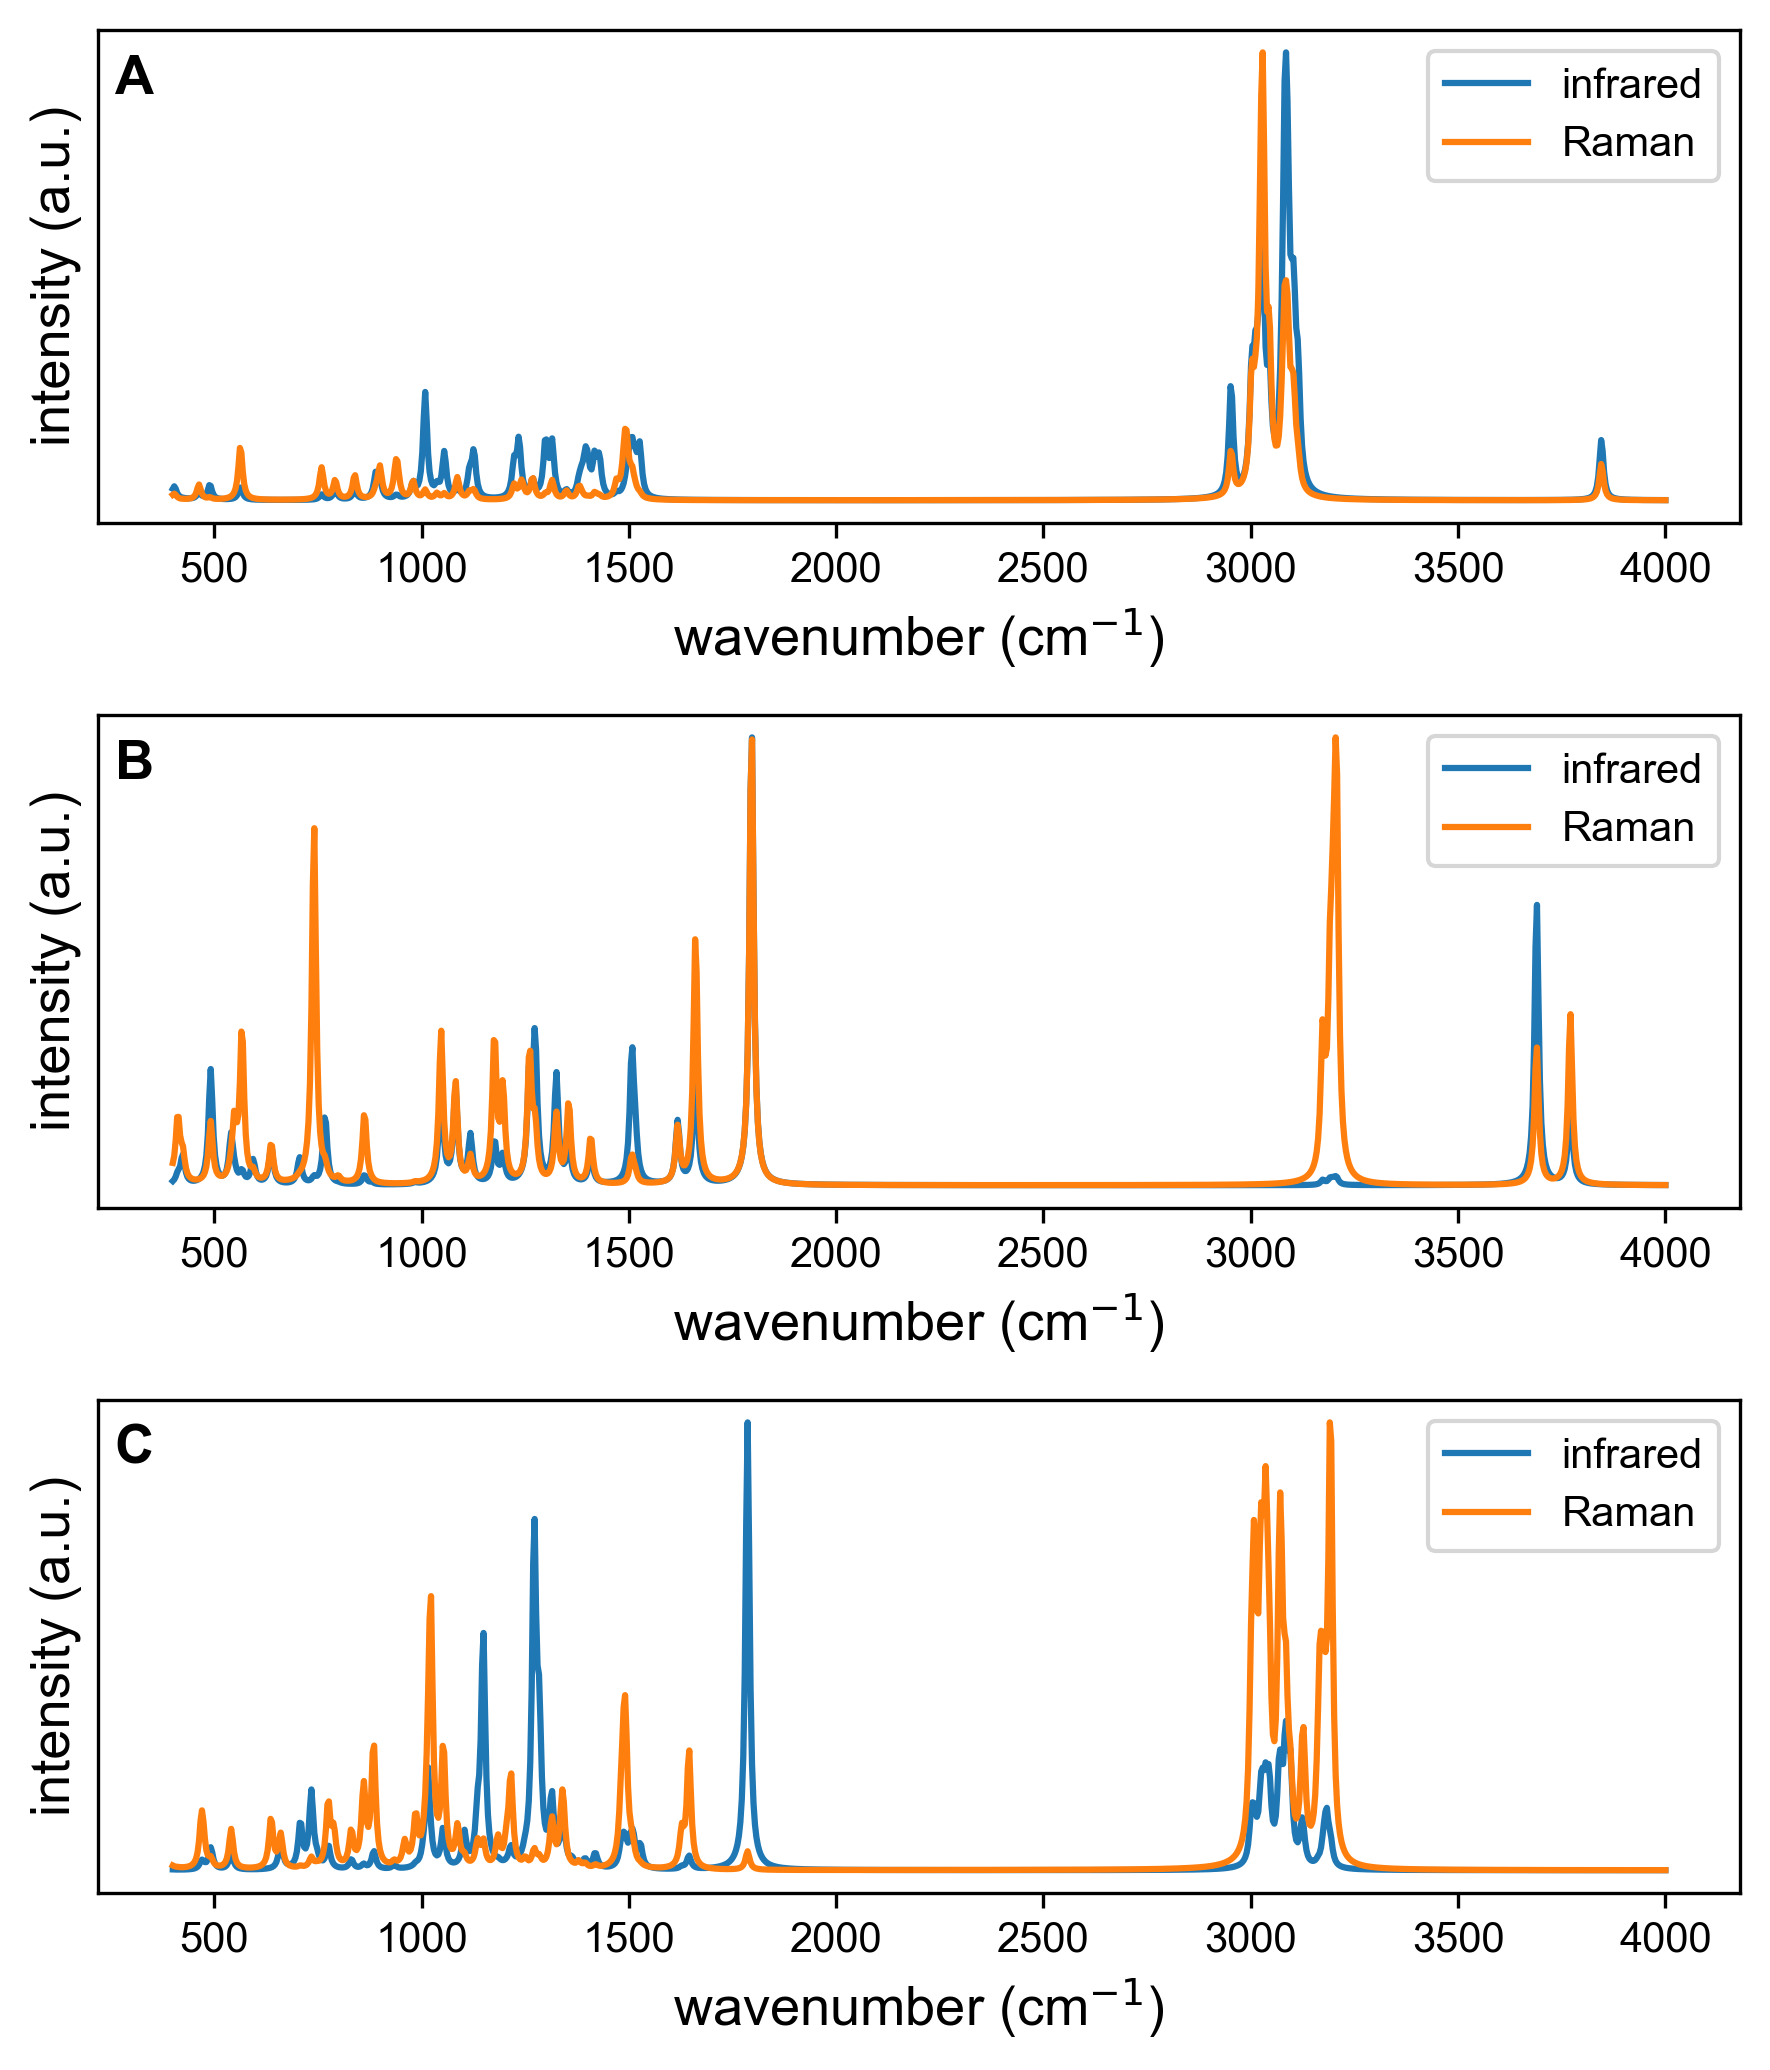

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'
matplotlib.font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

fontsize = 13


idx1 = 3
plt.figure(figsize=(6, 7), dpi=300, tight_layout=True)
plt.subplot(311)
plt.plot(np.linspace(400, 4000, 1024), train_df.iloc[idx1]['ir'], label='infrared')
plt.plot(np.linspace(400, 4000, 1024), train_df.iloc[idx1]['raman'], label='Raman')
plt.xlabel('wavenumber (cm$^{-1}$)', fontsize=fontsize)
plt.ylabel('intensity (a.u.)', fontsize=fontsize)
plt.yticks([])
plt.legend()
plt.text(0.01, 0.95, 'A', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')

idx2 = 14
plt.subplot(312)
plt.plot(np.linspace(400, 4000, 1024), train_df.iloc[idx2]['ir'], label='infrared')
plt.plot(np.linspace(400, 4000, 1024), train_df.iloc[idx2]['raman'], label='Raman')
plt.xlabel('wavenumber (cm$^{-1}$)', fontsize=fontsize)
plt.ylabel('intensity (a.u.)', fontsize=fontsize)
plt.yticks([])
plt.legend()
plt.text(0.01, 0.95, 'B', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')

idx3 = 19
plt.subplot(313)
plt.plot(np.linspace(400, 4000, 1024), train_df.iloc[idx3]['ir'], label='infrared')
plt.plot(np.linspace(400, 4000, 1024), train_df.iloc[idx3]['raman'], label='Raman')
plt.xlabel('wavenumber (cm$^{-1}$)', fontsize=fontsize)
plt.ylabel('intensity (a.u.)', fontsize=fontsize)
plt.yticks([])
plt.legend()
plt.text(0.01, 0.95, 'C', transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')

# plt.savefig('SI/nist_ir_raman.svg', format='svg')

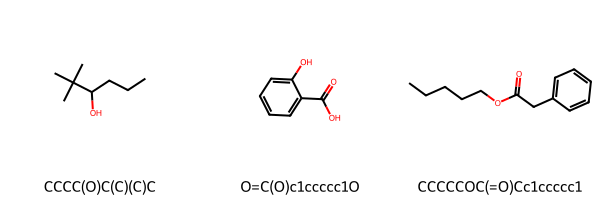

In [13]:
mols = [Chem.MolFromSmiles(train_df.iloc[idx1]['smiles']),
        Chem.MolFromSmiles(train_df.iloc[idx2]['smiles']),
        Chem.MolFromSmiles(train_df.iloc[idx3]['smiles'])]
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 200), legends=[train_df.iloc[idx1]['smiles'],
                                                                            train_df.iloc[idx2]['smiles'],
                                                                            train_df.iloc[idx3]['smiles']],
                                                                            useSVG=True)
img

# figure s5

In [14]:
# in `ppt`

# figure s6

In [15]:
# in `ppt`

# figure s7

In [16]:
# in `ppt`